## Federal Funds Effective Rate (FEDFUNDS)
### Access historical data on the federal funds rate, a key indicator of monetary policy.

In [3]:
import pandas as pd

df = pd.read_csv('/Users/rakeshgoudedigi/Desktop/Python FInal project /FED interest rates.csv')

df.head()

,observation_date,FEDFUNDS
0,1/1/00,5.45
1,2/1/00,5.73
2,3/1/00,5.85
3,4/1/00,6.02
4,5/1/00,6.27


In [4]:
def format_to_new(value):
    return f"{value:.1f}%"

df['FEDFUNDS_new']=df['FEDFUNDS'].apply(format_to_new)

#dropping the older fedfunds column
df=df.drop(columns=['FEDFUNDS'])

# to see the top 5 rows
df.head()

,observation_date,FEDFUNDS_new
0,1/1/00,5.5%
1,2/1/00,5.7%
2,3/1/00,5.8%
3,4/1/00,6.0%
4,5/1/00,6.3%


## Consumer Spending - Personal Consumption Expenditures (PCE)
### Monthly estimates of consumer spending on goods and services in the U.S.

In [5]:
df1=pd.read_csv('/Users/rakeshgoudedigi/Desktop/Python FInal project /Personal Consumption expenditures.csv')

df1.head()

,observation_date,PCE
0,2000-01-01,6542.9
1,2000-02-01,6625.3
2,2000-03-01,6686.5
3,2000-04-01,6679.1
4,2000-05-01,6709.7


### Formating PCE(Personal Consumption Expenditures values into human-Readable Labels

In [6]:
def format_to_trillions(value):
    return f"${value/1000:.1f} trillion"

df1['PCE_readable']=df1['PCE'].apply(format_to_trillions)

#dropping the PCE column 
df1=df1.drop(columns=['PCE'])

#reading the first five rows 
df1.head()

,observation_date,PCE_readable
0,2000-01-01,$6.5 trillion
1,2000-02-01,$6.6 trillion
2,2000-03-01,$6.7 trillion
3,2000-04-01,$6.7 trillion
4,2000-05-01,$6.7 trillion


### Loan Defaults Dataset 

In [7]:
df2=pd.read_csv('/Users/rakeshgoudedigi/Desktop/Python FInal project /loan defaults.csv')

df2.head()

,observation_date,DRALACBN
0,2000-01-01,2.11
1,2000-04-01,2.08
2,2000-07-01,2.19
3,2000-10-01,2.40
4,2001-01-01,2.44


In [8]:
def format_to_new(value):
    return f"{value:.1f}%"

df2['Loan Default Rate']=df2['DRALACBN'].apply(format_to_new)

#dropping off the older column
df2 = df2.drop(columns=['DRALACBN'])

#to see the top 5 rows
df2.head()

,observation_date,Loan Default Rate
0,2000-01-01,2.1%
1,2000-04-01,2.1%
2,2000-07-01,2.2%
3,2000-10-01,2.4%
4,2001-01-01,2.4%


In [31]:
df2.dtypes

observation_date     object
Loan Default Rate    object
dtype: object

In [9]:
df2['observation_date']= pd.to_datetime(df2['observation_date'])
df1['observation_date']=pd.to_datetime(df1['observation_date'])
df['observation_date']=pd.to_datetime(df['observation_date'])

/var/folders/4c/p7vprm9d6pq9cy5g9c7zn0xh0000gn/T/ipykernel_1306/2926969849.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['observation_date']=pd.to_datetime(df['observation_date'])


In [41]:
df.dtypes

observation_date    datetime64[ns]
FEDFUNDS_new                object
dtype: object

### Merging the FEDFUNDS and PCE datasets on observation_date

In [10]:
merged_df=pd.merge(df,df1,on='observation_date',how='inner')

merged_df.head()

,observation_date,FEDFUNDS_new,PCE_readable
0,2000-01-01,5.5%,$6.5 trillion
1,2000-02-01,5.7%,$6.6 trillion
2,2000-03-01,5.8%,$6.7 trillion
3,2000-04-01,6.0%,$6.7 trillion
4,2000-05-01,6.3%,$6.7 trillion


### Extracting the year from observation_date

In [11]:
merged_df['Year']=merged_df['observation_date'].dt.year

merged_df.head()

,observation_date,FEDFUNDS_new,PCE_readable,Year
0,2000-01-01,5.5%,$6.5 trillion,2000
1,2000-02-01,5.7%,$6.6 trillion,2000
2,2000-03-01,5.8%,$6.7 trillion,2000
3,2000-04-01,6.0%,$6.7 trillion,2000
4,2000-05-01,6.3%,$6.7 trillion,2000


### Computing the average interest rate and average PCE for each year to understand the yearly trend

In [13]:
# first, we will convert the readable columns back to numeric 
merged_df['Interest Rate (%)']=merged_df['FEDFUNDS_new'].str.rstrip('%').astype(float)
merged_df['PCE ($ Trillions)']=merged_df['PCE_readable'].str.extract(r'\$(\d+\.\d+)').astype(float)

#grouping by year and caluculate the mean.
yearly_avg=merged_df.groupby('Year')[['Interest Rate (%)','PCE ($ Trillions)']].mean().reset_index()

In [14]:
merged_df.head()

,observation_date,FEDFUNDS_new,PCE_readable,Year,Interest Rate (%),PCE ($ Trillions)
0,2000-01-01,5.5%,$6.5 trillion,2000,5.5,6.5
1,2000-02-01,5.7%,$6.6 trillion,2000,5.7,6.6
2,2000-03-01,5.8%,$6.7 trillion,2000,5.8,6.7
3,2000-04-01,6.0%,$6.7 trillion,2000,6.0,6.7
4,2000-05-01,6.3%,$6.7 trillion,2000,6.3,6.7


In [15]:
yearly_avg.head()

,Year,Interest Rate (%),PCE ($ Trillions)
0,2000,6.225000,6.766667
1,2001,3.891667,7.083333
2,2002,1.666667,7.341667
3,2003,1.125000,7.750000
4,2004,1.350000,8.225000


### Visualizing the trend between interest rate and consumer spending(PCE)

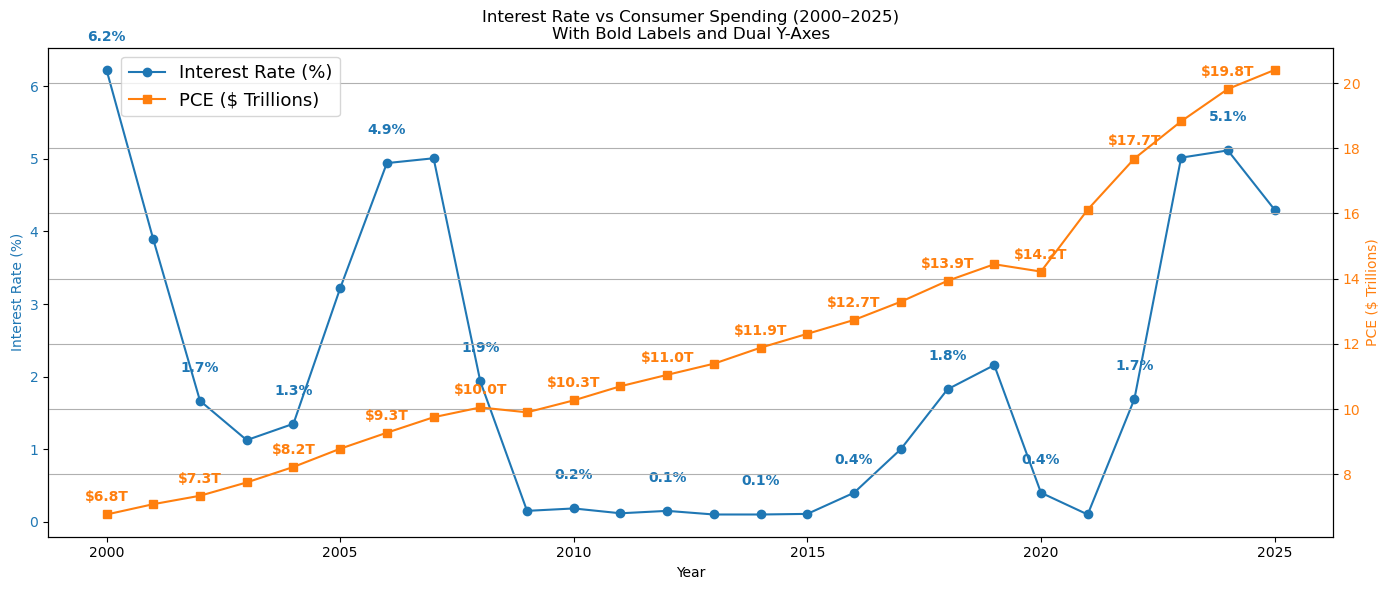

In [25]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Left Y-axis for Interest Rate
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Interest Rate (%)', color=color)
l1, = ax1.plot(yearly_avg['Year'], yearly_avg['Interest Rate (%)'], color=color, marker='o', label='Interest Rate (%)')
ax1.tick_params(axis='y', labelcolor=color)

# Bold and larger labels every 2nd year for Interest Rate
for i in range(0, len(yearly_avg), 2):
    val = yearly_avg['Interest Rate (%)'].iloc[i]
    year = yearly_avg['Year'].iloc[i]
    ax1.text(year, val + 0.4, f"{val:.1f}%", color=color, fontsize=10, fontweight='bold', ha='center')

# Right Y-axis for PCE
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('PCE ($ Trillions)', color=color)
l2, = ax2.plot(yearly_avg['Year'], yearly_avg['PCE ($ Trillions)'], color=color, marker='s', label='PCE ($ Trillions)')
ax2.tick_params(axis='y', labelcolor=color)

# Bold and larger labels every 2nd year for PCE
for i in range(0, len(yearly_avg), 2):
    val = yearly_avg['PCE ($ Trillions)'].iloc[i]
    year = yearly_avg['Year'].iloc[i]
    ax2.text(year, val + 0.4, f"${val:.1f}T", color=color, fontsize=10, fontweight='bold', ha='center')

# Add combined legend in top-left corner
plt.legend(handles=[l1, l2], loc='upper left', bbox_to_anchor=(0.05, 1), fontsize=13)

plt.title('Interest Rate vs Consumer Spending (2000–2025)\nWith Bold Labels and Dual Y-Axes')
plt.grid(True)
fig.tight_layout()
plt.show()

📌 **Summary of Findings: Interest Rate vs. Consumer Spending (2000–2025)**

🧠 **Initial Assumption**

The initial assumption was:

> “If interest rates increase, consumer spending will decrease, since borrowing becomes more expensive and saving is incentivized.”

This is grounded in basic economic theory — higher interest rates typically discourage borrowing and consumer expenditure.

---

🔍 **Insights from the Data**

From the dual-axis chart:
- Overall, consumer spending steadily increased year-over-year, from  $6.8T  in   2000  to  over   $20T  by  2025, despite fluctuations in interest rates.
- During **2008–2016**, interest rates were at historic lows (<1%), and PCE continued to grow — this aligns with expectations.
- However, in recent years (**2022–2024**), interest rates rose significantly due to inflation-fighting measures, yet consumer spending continued to climb.

👉 **Implication**: In certain periods, consumer spending is less sensitive to interest rates and may be driven by:
  - Wage growth
  - Stimulus checks (e.g., during COVID-19)
  - Supply chain recovery
  - Consumer confidence and wealth effect

---

📈 **Conclusion**
- The relationship is not strictly inverse.
- While economic theory holds for many timeframes, real-world consumer behavior is influenced by multiple macroeconomic factors beyond just interest rates.
- PCE appears to have a resilient upward trend, suggesting long-term economic expansion, policy interventions, and inflation playing a role.

### let’s explore now the relationship between interest rates and loan defaults to see if rising rates correlate with more defaults

#### Merging Interest Rate and Loan Default datasets

In [26]:
merged_df2=pd.merge(df,df2,on='observation_date',how='inner')

merged_df2.head()

,observation_date,FEDFUNDS_new,Loan Default Rate
0,2000-01-01,5.5%,2.1%
1,2000-04-01,6.0%,2.1%
2,2000-07-01,6.5%,2.2%
3,2000-10-01,6.5%,2.4%
4,2001-01-01,6.0%,2.4%


#### preparing the numeric columns for analysis

In [27]:
merged_df2['Interest Rate (%)'] = merged_df2['FEDFUNDS_new'].str.rstrip('%').astype(float)
merged_df2['Loan Default (%)'] = merged_df2['Loan Default Rate'].str.rstrip('%').astype(float)

merged_df2.head()

,observation_date,FEDFUNDS_new,Loan Default Rate,Interest Rate (%),Loan Default (%)
0,2000-01-01,5.5%,2.1%,5.5,2.1
1,2000-04-01,6.0%,2.1%,6.0,2.1
2,2000-07-01,6.5%,2.2%,6.5,2.2
3,2000-10-01,6.5%,2.4%,6.5,2.4
4,2001-01-01,6.0%,2.4%,6.0,2.4


### Caluculating the correlation 

#### We’ll compute the Pearson correlation coefficient to understand how closely interest rates and loan defaults are related.

#### A value:
#### 	•	Close to +1 = strong positive correlation (as interest increases, so do defaults)
#### 	•	Close to 0 = no clear relationship
#### 	•	Close to -1 = strong negative correlation

In [28]:
correlation = merged_df2[['Interest Rate (%)', 'Loan Default (%)']].corr().iloc[0, 1]
print(f"Correlation between Interest Rate and Loan Default Rate: {correlation:.2f}")

Correlation between Interest Rate and Loan Default Rate: -0.43


#### A correlation of -0.43 suggests a moderate negative relationship between interest rates and loan default rates.

>  **What does it mean?**
> - As interest rates increase, loan defaults tend to decrease slightly.
> - This is counterintuitive, as we often expect higher borrowing costs to cause more defaults.
> - Possible reasons:
>   - Banks might lend more conservatively during high-rate periods.
>   - Lag effects: defaults might rise after a delay.
>   - Other macroeconomic variables (employment, inflation) could be influencing it.

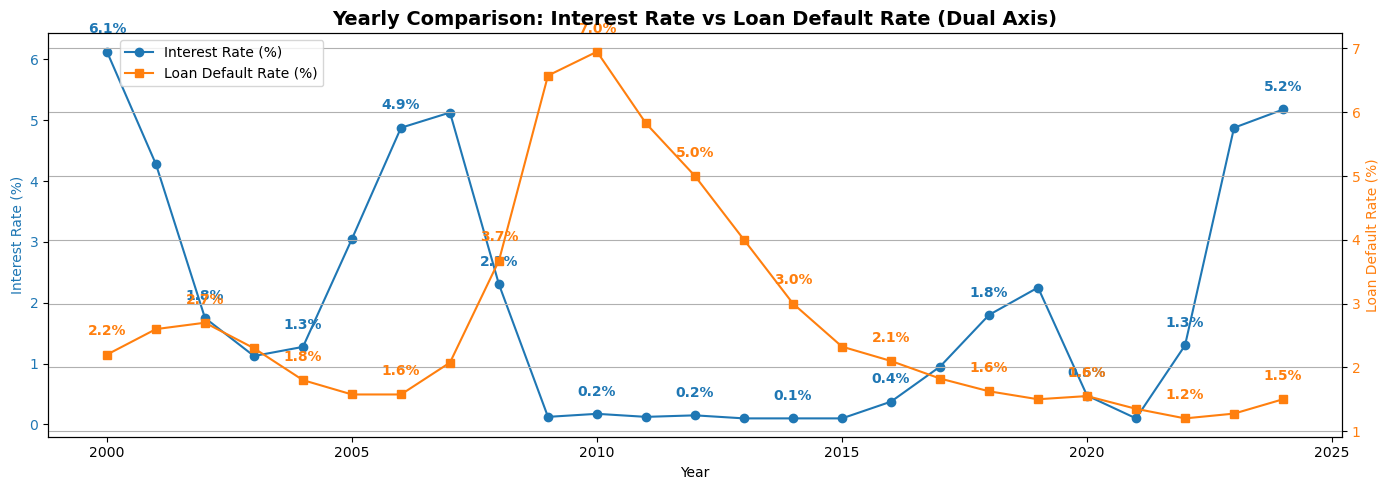

In [33]:
# Step 1: Prepare yearly average from merged_df2
merged_df2['Year'] = pd.to_datetime(merged_df2['observation_date']).dt.year
yearly_avg2 = merged_df2.groupby('Year')[['Interest Rate (%)', 'Loan Default (%)']].mean().reset_index()

# Step 2: Plot using dual axes
fig, ax1 = plt.subplots(figsize=(14, 5))

# Left Y-axis for Interest Rate
color1 = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Interest Rate (%)', color=color1)
l1, = ax1.plot(yearly_avg2['Year'], yearly_avg2['Interest Rate (%)'], color=color1, marker='o', label='Interest Rate (%)')
ax1.tick_params(axis='y', labelcolor=color1)

# Annotate every 2nd point
for i in range(0, len(yearly_avg2), 2):
    val = yearly_avg2['Interest Rate (%)'].iloc[i]
    year = yearly_avg2['Year'].iloc[i]
    ax1.text(year, val + 0.3, f"{val:.1f}%", color=color1, fontsize=10, fontweight='bold', ha='center')

# Right Y-axis for Loan Defaults
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel('Loan Default Rate (%)', color=color2)
l2, = ax2.plot(yearly_avg2['Year'], yearly_avg2['Loan Default (%)'], color=color2, marker='s', label='Loan Default Rate (%)')
ax2.tick_params(axis='y', labelcolor=color2)

# Annotate every 2nd point
for i in range(0, len(yearly_avg2), 2):
    val = yearly_avg2['Loan Default (%)'].iloc[i]
    year = yearly_avg2['Year'].iloc[i]
    ax2.text(year, val + 0.3, f"{val:.1f}%", color=color2, fontsize=10, fontweight='bold', ha='center')

# Combine legend
plt.legend(handles=[l1, l2], loc='upper left', bbox_to_anchor=(0.05, 1), fontsize=10)

# Title & layout
plt.title("Yearly Comparison: Interest Rate vs Loan Default Rate (Dual Axis)", fontsize=14, fontweight='bold')
plt.grid(True)
fig.tight_layout()
plt.show()

📌 **Summary of Findings: Interest Rate vs. Loan Default Rate (2000–2025)**

🧠 **Initial Assumption**

At the beginning of this analysis, the assumption was:

> “If interest rates increase, then loan defaults will also increase — because higher borrowing costs make it harder for people to repay loans.”

This assumption seems intuitive from a consumer behavior standpoint.

---

🔍 **What the Data Actually Shows**

From the dual-axis trend chart:
- There are several periods where this assumption does not hold true.
- **2008–2010**: Interest rates dropped sharply (post-recession stimulus), but loan defaults spiked.  
  👉 This suggests that macroeconomic shocks (like the housing crisis) influence defaults more than interest rates alone.
- **2011–2019**: Interest rates stayed low, yet defaults declined gradually, showing signs of recovery.
- **2022–2024**: Interest rates increased again due to inflationary pressures, but loan default rates stayed low.  
  👉 This could mean improved borrower profiles, stricter lending standards, or post-pandemic financial resilience.

---

📈 **Conclusion**
- There is not a direct linear relationship between interest rates and loan defaults.
- Other factors like:
  - Unemployment
  - Global crises (e.g., 2008 crash, COVID-19)
  - Lending policies
  - Consumer sentiment  
play a critical role in loan defaults, beyond just interest rate levels.